# MAT281 - Laboratorio N°03



Nombre: Cristóbal Lobos

Rol: 201610519-0

<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [94]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588
...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.105150
36787,2016,0.9,3.0,246.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155
36788,2016,0.9,3.0,255.000000,Coches pequeños,dos,Manual,Premium,muy pequeño,muy bajo,muy bajo,0.111336
36789,2017,0.9,3.0,248.000000,Coches pequeños,dos,Automatica,Premium,muy pequeño,muy bajo,muy bajo,0.108155


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


In [97]:
########Parte 1.A

df_num = df[['year','desplazamiento','cilindros','co2','consumo_litros_milla']] #solo columnas con valores numericos
for col in df_num.columns: #iteracion sobre columnas
    df_num[col] = df_num[col].fillna(df_num[col].mean()) #Reemplazar los NaN por el promedio de la columna

df_num.isna().sum() #Verificacion de si quedan valores Nan

year                    0
desplazamiento          0
cilindros               0
co2                     0
consumo_litros_milla    0
dtype: int64

In [98]:
##########Parte 1.B

scaler = MinMaxScaler()
df_num[df_num.columns] = scaler.fit_transform(df_num[df_num.columns])
df_num.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0.000000,0.243590,0.142857,0.398014,0.331027
1,0.000000,0.461538,0.285714,0.527672,0.475113
2,0.029412,0.243590,0.142857,0.424351,0.360294
3,0.029412,0.461538,0.285714,0.527672,0.475113
4,0.088235,0.410256,0.285714,0.424351,0.360294


In [99]:
#############Parte 2

df_cat = df.drop(['year','desplazamiento','cilindros','co2','consumo_litros_milla'], axis=1)

df_cat = pd.get_dummies(df_cat)
df_cat.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [100]:
#####Parte 3

df_procesado = pd.concat([df_num, df_cat], axis=1) #Se juntan ambos dataframe creados en la parte 1 y 2
df_procesado.head() 

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas
    
    

In [101]:
#######Parte 1

X = np.array(df_procesado)
kmeans = KMeans(n_clusters= 8,n_init=25, random_state=123)
kmeans.fit(X)

KMeans(n_init=25, random_state=123)

In [102]:
#########Parte 2
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

df_procesado2 = df_procesado
df_procesado2["cluster"] = clusters
df_procesado2["cluster"] = df_procesado["cluster"].astype('category') #Tenemos el dataframe final con el cluster asociado a cada item

df_procesado2.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,6
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,3
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6


In [121]:
for i in range(1,9):
    df2 = df_procesado2.loc[df_procesado2['cluster'] == i]
    df2 = df_procesado2[['year','desplazamiento','cilindros','co2','consumo_litros_milla']] #Solo variables numericas
    
    df2[['year','desplazamiento','cilindros','co2','consumo_litros_milla']] = df[['year','desplazamiento','cilindros','co2','consumo_litros_milla']] 
    ##Regresamos los valores originales antes de escalar para tener observaciones más interpretables
    
    print('----------------------O----------------------')
    print('Cluster' + str(i))
    print('Promedio')
    print(df2.mean())
    print(' ')
    print('Moda')
    print(df.mean())
    print('----------------------O----------------------')


----------------------O----------------------
Cluster1
Promedio
year                    2000.787421
desplazamiento             3.321786
cilindros                  5.746493
co2                      473.185008
consumo_litros_milla       0.201134
dtype: float64
 
Moda
year                    2000.787421
desplazamiento             3.321786
cilindros                  5.746493
co2                      473.185008
consumo_litros_milla       0.201134
dtype: float64
----------------------O----------------------
----------------------O----------------------
Cluster2
Promedio
year                    2000.787421
desplazamiento             3.321786
cilindros                  5.746493
co2                      473.185008
consumo_litros_milla       0.201134
dtype: float64
 
Moda
year                    2000.787421
desplazamiento             3.321786
cilindros                  5.746493
co2                      473.185008
consumo_litros_milla       0.201134
dtype: float64
----------------------O---------

In [103]:
#######Centroides

centroids_df = pd.DataFrame(centroids)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]
centroids_df.head()

centroids_final = centroids_df.set_index('cluster')
centroids_final #Vemos el centroide de cada cluster, con el cluster como indice del dataframe

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.695702,0.179404,0.150728,0.240178,0.156814,-2.386980e-15,0.110189,0.027742,0.181747,0.546539,...,-3.469447e-15,4.746203e-15,2.592689e-04,-3.108624e-15,9.997407e-01,-1.137979e-15,1.737101e-02,5.185377e-04,-3.108624e-15,9.821104e-01
2,0.524326,0.250778,0.195544,0.304383,0.226563,6.235534e-02,0.095167,0.045745,0.153710,0.448468,...,-2.664535e-15,9.768550e-01,9.992007e-16,3.386180e-15,2.314500e-02,8.326673e-17,9.933288e-01,5.309735e-03,9.159340e-16,1.361470e-03
3,0.409209,0.333730,0.257964,0.354182,0.281221,1.782721e-01,0.083817,0.093327,0.135558,0.182302,...,-4.857226e-15,3.288201e-02,9.619600e-01,-1.026956e-15,5.157963e-03,1.450677e-03,6.447453e-04,9.979046e-01,-2.359224e-15,-2.303713e-15
4,0.384236,0.585590,0.430797,0.510289,0.454503,2.592502e-01,0.005599,0.059153,0.059396,0.197420,...,3.115871e-02,4.440892e-16,1.168452e-02,9.571568e-01,-4.912737e-15,1.703992e-03,7.216450e-16,4.868549e-04,9.978092e-01,-1.720846e-15
5,0.438404,0.159576,0.141184,0.242287,0.156504,1.640712e-02,0.124861,0.006396,0.092881,0.709956,...,-3.275158e-15,4.218847e-15,2.386980e-15,-2.942091e-15,1.000000e+00,-9.992007e-16,2.780868e-03,1.390434e-03,-3.247402e-15,9.958287e-01
6,0.452443,0.562730,0.405562,0.501887,0.442585,4.354414e-01,0.001318,0.003953,0.010211,0.058300,...,5.764163e-02,4.080070e-15,5.599473e-03,9.367589e-01,-4.218847e-15,-8.881784e-16,6.938894e-16,1.720846e-15,1.000000e+00,2.359224e-15
7,0.476852,0.450916,0.327240,0.409956,0.343253,3.042549e-01,0.017105,0.041480,0.048535,0.150951,...,9.585204e-01,3.497203e-15,4.062433e-02,8.552491e-04,-5.134781e-15,9.950823e-01,6.414368e-04,6.414368e-04,3.634809e-03,1.249001e-15
8,0.588065,0.362121,0.299467,0.354068,0.282213,1.512097e-03,0.083921,0.086442,0.190020,0.561240,...,5.040323e-04,2.746976e-02,9.720262e-01,-2.997602e-15,-4.912737e-15,2.318548e-02,7.216450e-16,9.768145e-01,-3.996803e-15,1.193490e-15


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [105]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_procesado).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,127152.232822
1,10,83115.396170
2,20,67439.735735
3,30,57245.369654
4,50,45400.423025


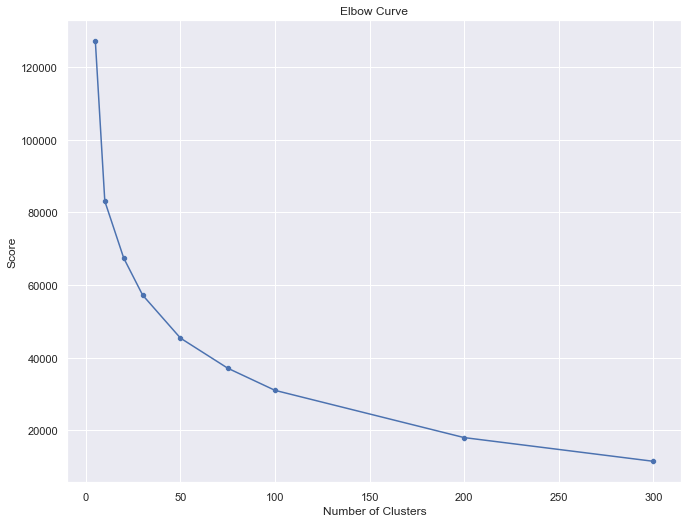

In [111]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

A partir de 200 clusters se ve que el Score baja y empieza a estabilizarse.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [145]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [146]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### PCA

In [151]:
# Entrenamiento de PCA con escalamiento de datos

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

df = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)

df ##Datos despues de aplicarles PCA  y escalamiento

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


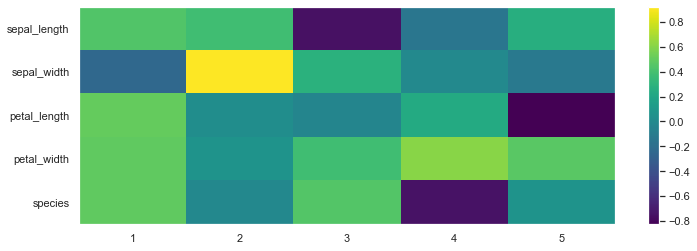

In [152]:
# Mapa de calor para ver la influencia de variables sobre otras
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

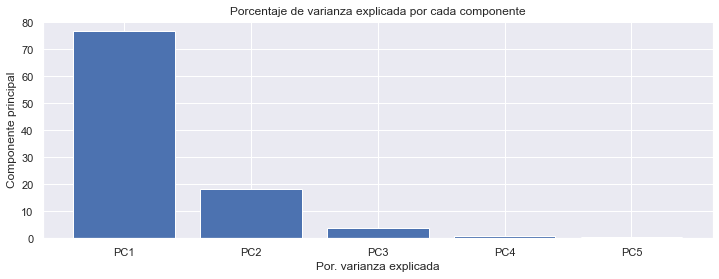

In [155]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

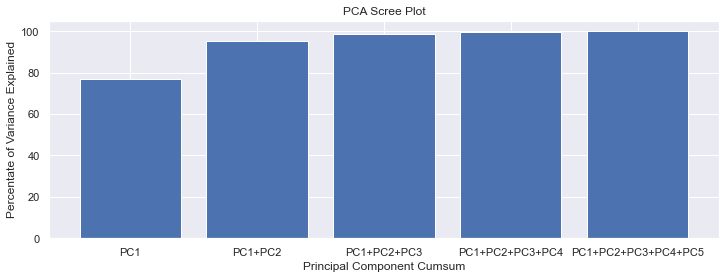

In [156]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4', 'PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Se puede ver que si se utilizan solo las 3 primeras componentes se tiene casi cerca de un 100% de la varianza explicada.